,win_count,frequency,prob,payout
1,1,6,0.00006,-18
2,2,22,0.00022,-16
3,3,149,0.00149,-14
4,4,645,0.00645,-12
5,5,1898,0.01898,-10
6,6,4345,0.04345,-8
7,7,8691,0.08691,-6
8,8,13267,0.13267,-4
9,9,16825,0.16825,-2
10,10,17335,0.17335,0


expected win -0.5137


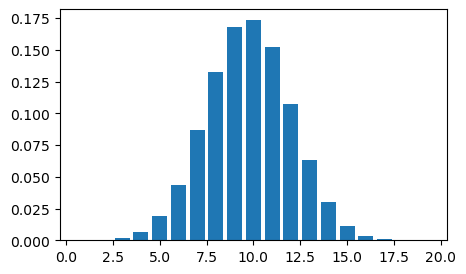

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

nums = np.arange(0,37)
random.choice(nums)

game_wins = []
days = 100000
for day in range(days):
	day_wins = []
	for game in range(20):
		ball_num = random.choice(nums)
		if ball_num % 2 == 0:
			day_wins.append(0)
		else:
			day_wins.append(1)
	day_win_count = sum(day_wins)
	game_wins.append(day_win_count)
	

freqs = pd.Series(game_wins).value_counts()
wdf = pd.DataFrame({
	'win_count': freqs.index,
	'frequency': freqs
})

wdf['prob'] = wdf['frequency'] / days
wdf['payout'] = wdf['win_count'] - (20-wdf['win_count'])
wdf = wdf.sort_values(by='win_count', ascending=True)


plt.figure(figsize=(5,3))
plt.bar(wdf['win_count'],wdf['prob'])

display(wdf)
print("expected win", sum(wdf['payout']*wdf['prob']))

plt.show()

0.5781167253290128


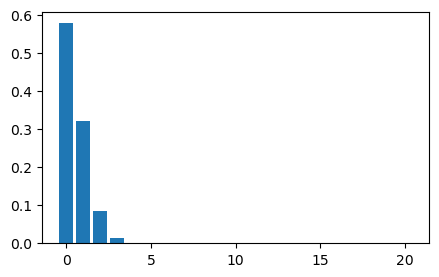

In [99]:
from scipy.stats import binom

print(binom.pmf(0,20,1/37))
# display(wdf)

probs = []
for win in range(21):
	win_prob = binom.pmf(win, 20, 1/37)
	probs.append({
		'win_count': win,
		'win_prob': win_prob
	})

win_df = pd.DataFrame(probs)
win_df['win_prob'] = win_df['win_prob'].apply(lambda x: round(float(x), ndigits= 10))
# display(win_df)

plt.figure(figsize=(5,3))
plt.bar(win_df['win_count'],win_df['win_prob'])

plt.show()

In [ ]:
for win in range(31):
	win_lose = win*8-(30-win)
	print(f"winning {win} times, your gain is {win_lose}")



winning 0 times, your gain is -30
winning 1 times, your gain is -21
winning 2 times, your gain is -12
winning 3 times, your gain is -3
winning 4 times, your gain is 6
winning 5 times, your gain is 15
winning 6 times, your gain is 24
winning 7 times, your gain is 33
winning 8 times, your gain is 42
winning 9 times, your gain is 51
winning 10 times, your gain is 60
winning 11 times, your gain is 69
winning 12 times, your gain is 78
winning 13 times, your gain is 87
winning 14 times, your gain is 96
winning 15 times, your gain is 105
winning 16 times, your gain is 114
winning 17 times, your gain is 123
winning 18 times, your gain is 132
winning 19 times, your gain is 141
winning 20 times, your gain is 150
winning 21 times, your gain is 159
winning 22 times, your gain is 168
winning 23 times, your gain is 177
winning 24 times, your gain is 186
winning 25 times, your gain is 195
winning 26 times, your gain is 204
winning 27 times, your gain is 213
winning 28 times, your gain is 222
winning 

0.0864838869276668

[23 25 27 29 31 33 35 37 39 41 43 45 47 49 51]
[0.0060301  0.01377571 0.02684463 0.04462265 0.06327139 0.07652683
 0.07895403 0.06948469 0.05216248 0.0334027  0.01824564 0.00850141
 0.00337891 0.00114556 0.00033129]


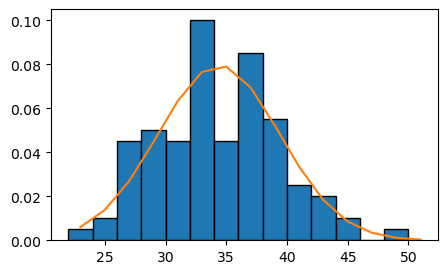

12.392236222709366

In [ ]:
from scipy.stats import norm


df = pd.read_csv("waist.csv")
df

size_bins = np.arange(22, 51, 2)

plt.figure(figsize=(5,3))
plt.hist(df['waist'], bins=size_bins, edgecolor= "k", density=True)

mean = df['waist'].mean()
std = df['waist'].std(ddof=1)

ys = size_bins+1
print(ys)
ys = norm.pdf(ys, mean, std)
print(ys)
plt.plot(size_bins+1, ys)
plt.show()

(norm.cdf(24, mean, std) - norm.cdf(22, mean, std))* 1000

for wst in size_bins:
	prob = norm.cdf(wst+2, mean, std) - norm.cdf(wst, mean, std)
	count = round(prob*1000)
	print